# Extract Foercasted Weather Data
# -------------------------------

## Initial Imports

In [1]:
# Import Dependencies
import requests
import pandas as pd
import json
import numpy as np
import datetime
from dateutil import tz

In [3]:
# Import API Key
from config import weather_api_key

In [4]:
# Documentation
# https://openweathermap.org/api/one-call-api

# Define the Functions
# --------------------

In [5]:
def convert_DateTime_UTC_to_CST(UTC_datetime_list, list_range):
    CST_datetime_list = []

    for date in list_range:    
        # Convert the date/time to ISO standard in string format
        date_time = datetime.datetime.utcfromtimestamp(UTC_datetime_list[date]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Create a datetime object, representing the UTC time
        time_utc = datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S')

        # Replace the timezone field of the datetime object to UTC
        from_zone = tz.gettz('UTC')
        time_utc = time_utc.replace(tzinfo=from_zone)

        # Convert time zone from UTC to central
        to_zone = tz.gettz('America/Chicago')
        time_cst = time_utc.astimezone(to_zone)

        # Append the date/time, year, month, day, and hour
        CST_datetime_list.append({
            "UTC_Time": UTC_datetime_list[date],
            "Date_Time": time_cst.strftime('%Y-%m-%d %H:%M:%S'),
            "Year": time_cst.year,
            "Month":time_cst.month,
            "Day":time_cst.day,
            "Hour":time_cst.hour
            })

    datetimeDataFrame = pd.DataFrame(CST_datetime_list)
    
    return datetimeDataFrame

In [6]:
def calculate_sunhour(sunrise_list, sunset_list, list_range):
    
    sunhour_list = []

    for day in list_range:
        # Convert the date/time to ISO standard in string format
        sunrise_date_time = datetime.datetime.utcfromtimestamp(sunrise_list[day]).strftime('%Y-%m-%d %H:%M:%S')
        sunset_date_time = datetime.datetime.utcfromtimestamp(sunset_list[day]).strftime('%Y-%m-%d %H:%M:%S')

        # Create a datetime object, representing the UTC time
        sunrise_utc = datetime.datetime.strptime(sunrise_date_time, '%Y-%m-%d %H:%M:%S')
        sunset_utc = datetime.datetime.strptime(sunset_date_time, '%Y-%m-%d %H:%M:%S')

        # Replace the timezone field of the datetime object to UTC
        from_zone = tz.gettz('UTC')
        
        sunrise_utc = sunrise_utc.replace(tzinfo=from_zone)
        sunset_utc = sunset_utc.replace(tzinfo=from_zone)

        # Convert time zone from UTC to central
        to_zone = tz.gettz('America/Chicago')
        
        sunrise_cst = sunrise_utc.astimezone(to_zone)
        sunset_cst = sunset_utc.astimezone(to_zone)
        
        # Convert to string
        sunrise_str = sunrise_cst.strftime('%Y-%m-%d %H:%M:%S')
        sunset_str = sunset_cst.strftime('%Y-%m-%d %H:%M:%S')

        # Calculate Sunhour
        sunrise = datetime.datetime.strptime(sunrise_str, '%Y-%m-%d %H:%M:%S')
        sunset = datetime.datetime.strptime(sunset_str, '%Y-%m-%d %H:%M:%S')
        Sunhour_timedelta = sunset - sunrise
        Sunhour_seconds = Sunhour_timedelta.seconds
        Sunhour = Sunhour_seconds / 3600

        # Append to List
        sunhour_list.append({
            "Sunrise": sunrise_list[day],
            "Sunhour": Sunhour
        })
        
    sunhourDataFrame = pd.DataFrame(sunhour_list)
    
    return sunhourDataFrame

# Webberville Solar Farm
# ----------------------

In [7]:
# Geographical coordinates (latitude, longitude)
lat = "30.238333"
lon = "-97.508611"

# Exclude some parts of the weather data from the API response
    # It should be a comma-delimited list (without spaces)
    # Options: current,minutely,hourly,daily,alerts
part = "minutely,alerts"

# Define the Units of measurement
    # Options: stadnard,metric,imperial
units = "imperial"

# Make a request to openweathermap
requestURL = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&units={units}&appid={weather_api_key}"

# print(requestURL)

In [8]:
response = requests.get(requestURL)

if response.status_code == 200:
    # Turn the response into a JSON object
    responseJson = response.json()
    print("Successfully turned response into JSON object.")
else:
    # Else, print the Error status code
    print("The Error Status Code is:") 
    print(response.status_code)

Successfully turned response into JSON object.


# Current Weather Data:

## Date / Time

In [9]:
# Convert the date/time to ISO standard in string format
current_date_time = datetime.datetime.utcfromtimestamp(responseJson["current"]["dt"]).strftime('%Y-%m-%d %H:%M:%S')

# Create a datetime object, representing the UTC time
current_time_utc = datetime.datetime.strptime(current_date_time, '%Y-%m-%d %H:%M:%S')

# Replace the timezone field of the datetime object to UTC
from_zone = tz.gettz('UTC')
current_time_utc = current_time_utc.replace(tzinfo=from_zone)

# Convert time zone from UTC to central
to_zone = tz.gettz('America/Chicago')
current_time_cst = current_time_utc.astimezone(to_zone)

# Display the current time
current_time_cst

datetime.datetime(2020, 11, 10, 16, 36, 15, tzinfo=tzfile('US/Central'))

In [10]:
# Extract the date & time and store as a string
current_Date_Time = current_time_cst.strftime('%Y-%m-%d %H:%M:%S')

# Display the date & time as string
current_Date_Time

'2020-11-10 16:36:15'

In [11]:
# Extract the date and store as a string
current_Date = datetime.datetime.date(current_time_cst)
current_Date = current_Date.strftime('%Y-%m-%d')

# Display the date in %Y-%m-%d
current_Date

'2020-11-10'

In [12]:
# Exract the time in %H:%M:%S
current_Time = current_time_cst.strftime('%H:%M:%S')

# Display the hour
current_Time

'16:36:15'

In [13]:
# Extract the year from the current time
current_Year = current_time_cst.year

# Display the year
current_Year

2020

In [14]:
# Extract the month from the current time
current_Month = current_time_cst.month

# Display the year
current_Month

11

In [15]:
# Extract the day from the current time
current_Day = current_time_cst.day

# Display the day
current_Day

10

In [16]:
# Extract the hour from the current time
current_Hour = current_time_cst.hour

# Display the day
current_Hour

16

In [17]:
# Alternative:
# Extract the hour from the current time
current_Hour = datetime.datetime.time(current_time_cst).hour

# Display the hour
current_Hour

16

In [18]:
# Store the next day as a variable
next_day = datetime.date(current_Year, current_Month, current_Day) + datetime.timedelta(days=1)
next_day

datetime.date(2020, 11, 11)

## Weather Description

In [19]:
# Extract the current weather description
current_Weather_Description = responseJson["current"]["weather"][0]["description"]

# Display the weather description
current_Weather_Description

'overcast clouds'

## Temperature

In [20]:
# Extract the current temperature (F)
current_Temperature_F = responseJson["current"]["temp"]

# Display the temperature
current_Temperature_F

77.25

## Sunhour

In [21]:
# Sunrise:

# Convert the date/time to ISO standard in string format
sunrise_date_time = datetime.datetime.utcfromtimestamp(responseJson["current"]["sunrise"]).strftime('%Y-%m-%d %H:%M:%S')

# Create a datetime object, representing the UTC time
sunrise_utc = datetime.datetime.strptime(sunrise_date_time, '%Y-%m-%d %H:%M:%S')

# Replace the timezone field of the datetime object to UTC
from_zone = tz.gettz('UTC')
sunrise_utc = sunrise_utc.replace(tzinfo=from_zone)

# Convert time zone from UTC to central
to_zone = tz.gettz('America/Chicago')
todays_sunrise = sunrise_utc.astimezone(to_zone)

# Convert to string
todays_sunrise = todays_sunrise.strftime('%Y-%m-%d %H:%M:%S')

# Display sunrise time
todays_sunrise

'2020-11-10 06:51:57'

In [22]:
# Sunset:

# Convert the date/time to ISO standard in string format
sunset_date_time = datetime.datetime.utcfromtimestamp(responseJson["current"]["sunset"]).strftime('%Y-%m-%d %H:%M:%S')

# Create a datetime object, representing the UTC time
sunset_utc = datetime.datetime.strptime(sunset_date_time, '%Y-%m-%d %H:%M:%S')

# Replace the timezone field of the datetime object to UTC
from_zone = tz.gettz('UTC')
sunset_utc = sunset_utc.replace(tzinfo=from_zone)

# Convert time zone from UTC to central
to_zone = tz.gettz('America/Chicago')
todays_sunset = sunset_utc.astimezone(to_zone)

# Convert to string
todays_sunset = todays_sunset.strftime('%Y-%m-%d %H:%M:%S')

# Display sunrise time
todays_sunset

'2020-11-10 17:36:13'

In [23]:
todays_sunrise = datetime.datetime.strptime(todays_sunrise, '%Y-%m-%d %H:%M:%S')
todays_sunset = datetime.datetime.strptime(todays_sunset, '%Y-%m-%d %H:%M:%S')
Sunhour_timedelta = todays_sunset - todays_sunrise
print(f"The sunhour time in %H:%M:%S : {Sunhour_timedelta}")
Sunhour_seconds = Sunhour_timedelta.seconds
todays_Sunhour = Sunhour_seconds / 3600
print(f"The sunhour time in hrs : {todays_Sunhour}")

The sunhour time in %H:%M:%S : 10:44:16
The sunhour time in hrs : 10.737777777777778


## Cloud Cover

In [24]:
# Extract the current cloud cover (%)
current_CloudCover_percent = responseJson["current"]["clouds"]

# Display the Cloudiness, %
current_CloudCover_percent

90

## uv Index

In [25]:
# Extract the current UV Index
todays_uvIndex = responseJson["current"]["uvi"]

# Display the Midday UV index
todays_uvIndex

5.12

## Humidity

In [26]:
# Extract the current humidity (%)
current_Humidity_percent = responseJson["current"]["humidity"]

# Display the Cloudiness, %
current_Humidity_percent

29

## Current Weather DataFrame

In [27]:
current_weather_DF = pd.DataFrame([{
    "Date_Time": current_Date_Time,
    "Year": current_Year, 
    "Month": current_Month, 
    "Day": current_Day, 
    "Hour": current_Hour, 
    "Temperature_F": current_Temperature_F, 
    "Humidity_percent": current_Humidity_percent,
    "Sunhour": todays_Sunhour, 
    "CloudCover_percent": current_CloudCover_percent,
    "uvIndex": todays_uvIndex,
    "Weather_Description": current_Weather_Description
}])

current_weather_DF["Date_Time"] = pd.to_datetime(current_weather_DF["Date_Time"])

current_weather_DF

,Date_Time,Year,Month,Day,Hour,Temperature_F,Humidity_percent,Sunhour,CloudCover_percent,uvIndex,Weather_Description
0,2020-11-10 16:36:15,2020,11,10,16,77.25,29,10.737778,90,5.12,overcast clouds


In [28]:
current_weather_DF.dtypes

Date_Time              datetime64[ns]
Year                            int64
Month                           int64
Day                             int64
Hour                            int64
Temperature_F                 float64
Humidity_percent                int64
Sunhour                       float64
CloudCover_percent              int64
uvIndex                       float64
Weather_Description            object
dtype: object

# Daily Forecasted Weather Data:

## Create a dataframe for the daily forecasted weather data

In [29]:
forecasted_daily_weather = []

for day in np.arange(0, 8, 1):
    forecasted_daily_weather.append({
        "UTC_Time": responseJson["daily"][day]["dt"],
        "Sunrise": responseJson["daily"][day]["sunrise"],
        "Sunset": responseJson["daily"][day]["sunset"],
        "uvIndex": responseJson["daily"][day]["uvi"]
    })

daily_weather_DF = pd.DataFrame(forecasted_daily_weather)
daily_weather_DF

,UTC_Time,Sunrise,Sunset,uvIndex
0,1605031200,1605012717,1605051373,5.12
1,1605117600,1605099167,1605137738,4.96
2,1605204000,1605185618,1605224105,5.14
3,1605290400,1605272068,1605310473,5.25
4,1605376800,1605358519,1605396843,4.79
5,1605463200,1605444970,1605483214,4.62
6,1605549600,1605531421,1605569587,4.50
7,1605636000,1605617872,1605655961,4.30


## Clean up the UTC_Time column: Convert UTC time to CST

In [30]:
daily_index = np.arange(0,8,1)

daily_UTC_date_time = daily_weather_DF["UTC_Time"]

date_time_DF = convert_DateTime_UTC_to_CST(daily_UTC_date_time, daily_index)

date_time_DF

,UTC_Time,Date_Time,Year,Month,Day,Hour
0,1605031200,2020-11-10 12:00:00,2020,11,10,12
1,1605117600,2020-11-11 12:00:00,2020,11,11,12
2,1605204000,2020-11-12 12:00:00,2020,11,12,12
3,1605290400,2020-11-13 12:00:00,2020,11,13,12
4,1605376800,2020-11-14 12:00:00,2020,11,14,12
5,1605463200,2020-11-15 12:00:00,2020,11,15,12
6,1605549600,2020-11-16 12:00:00,2020,11,16,12
7,1605636000,2020-11-17 12:00:00,2020,11,17,12


In [31]:
daily_weather_DF = pd.merge(daily_weather_DF, date_time_DF, on='UTC_Time', how='outer')
daily_weather_DF.drop(columns=["UTC_Time"], axis=1, inplace=True)
daily_weather_DF["Date_Time"] = pd.to_datetime(daily_weather_DF["Date_Time"])
daily_weather_DF

,Sunrise,Sunset,uvIndex,Date_Time,Year,Month,Day,Hour
0,1605012717,1605051373,5.12,2020-11-10 12:00:00,2020,11,10,12
1,1605099167,1605137738,4.96,2020-11-11 12:00:00,2020,11,11,12
2,1605185618,1605224105,5.14,2020-11-12 12:00:00,2020,11,12,12
3,1605272068,1605310473,5.25,2020-11-13 12:00:00,2020,11,13,12
4,1605358519,1605396843,4.79,2020-11-14 12:00:00,2020,11,14,12
5,1605444970,1605483214,4.62,2020-11-15 12:00:00,2020,11,15,12
6,1605531421,1605569587,4.50,2020-11-16 12:00:00,2020,11,16,12
7,1605617872,1605655961,4.30,2020-11-17 12:00:00,2020,11,17,12


## Use sunrise and sunset times to calculate the total hours of sunhour for each day

In [32]:
daily_index = np.arange(0,8,1)

UTC_sunrise = daily_weather_DF["Sunrise"]
UTC_sunset = daily_weather_DF["Sunset"]

sunhour_DF = calculate_sunhour(UTC_sunrise, UTC_sunset, daily_index)

sunhour_DF

,Sunrise,Sunhour
0,1605012717,10.737778
1,1605099167,10.714167
2,1605185618,10.690833
3,1605272068,10.668056
4,1605358519,10.645556
5,1605444970,10.623333
6,1605531421,10.601667
7,1605617872,10.580278


In [33]:
daily_weather_DF = pd.merge(daily_weather_DF, sunhour_DF, on='Sunrise', how='outer')
daily_weather_DF.drop(columns=["Sunrise", "Sunset"], axis=1, inplace=True)
daily_weather_DF

,uvIndex,Date_Time,Year,Month,Day,Hour,Sunhour
0,5.12,2020-11-10 12:00:00,2020,11,10,12,10.737778
1,4.96,2020-11-11 12:00:00,2020,11,11,12,10.714167
2,5.14,2020-11-12 12:00:00,2020,11,12,12,10.690833
3,5.25,2020-11-13 12:00:00,2020,11,13,12,10.668056
4,4.79,2020-11-14 12:00:00,2020,11,14,12,10.645556
5,4.62,2020-11-15 12:00:00,2020,11,15,12,10.623333
6,4.50,2020-11-16 12:00:00,2020,11,16,12,10.601667
7,4.30,2020-11-17 12:00:00,2020,11,17,12,10.580278


## Display the final daily forecasted weather dataframe

In [34]:
# Re-Order the columns
daily_weather_DF = daily_weather_DF[["Date_Time", "Year", "Month", "Day", "Hour", "Sunhour","uvIndex"]]
daily_weather_DF

,Date_Time,Year,Month,Day,Hour,Sunhour,uvIndex
0,2020-11-10 12:00:00,2020,11,10,12,10.737778,5.12
1,2020-11-11 12:00:00,2020,11,11,12,10.714167,4.96
2,2020-11-12 12:00:00,2020,11,12,12,10.690833,5.14
3,2020-11-13 12:00:00,2020,11,13,12,10.668056,5.25
4,2020-11-14 12:00:00,2020,11,14,12,10.645556,4.79
5,2020-11-15 12:00:00,2020,11,15,12,10.623333,4.62
6,2020-11-16 12:00:00,2020,11,16,12,10.601667,4.50
7,2020-11-17 12:00:00,2020,11,17,12,10.580278,4.30


In [35]:
# Check the data types
daily_weather_DF.dtypes

Date_Time    datetime64[ns]
Year                  int64
Month                 int64
Day                   int64
Hour                  int64
Sunhour             float64
uvIndex             float64
dtype: object

## Clean the dataframe so it can be merged with the hourly forecasted data

In [36]:
daily_weather_DF.drop(columns=["Date_Time", "Year", "Month", "Hour"], axis=1, inplace=True)
daily_weather_DF

,Day,Sunhour,uvIndex
0,10,10.737778,5.12
1,11,10.714167,4.96
2,12,10.690833,5.14
3,13,10.668056,5.25
4,14,10.645556,4.79
5,15,10.623333,4.62
6,16,10.601667,4.50
7,17,10.580278,4.30


# Hourly Forecasted Weather Data:

In [37]:
forecasted_hourly_weather = []

for hour in np.arange(0, 48, 1):
    forecasted_hourly_weather.append({
        "UTC_Time": responseJson["hourly"][hour]["dt"],
        "Temperature_F": responseJson["hourly"][hour]["temp"],
        "Weather_Description": responseJson["hourly"][hour]["weather"][0]["description"],
        "CloudCover_percent": responseJson["hourly"][hour]["clouds"],
        "Humidity_percent": responseJson["hourly"][hour]["humidity"]
    })

hourly_weather_DF = pd.DataFrame(forecasted_hourly_weather)
hourly_weather_DF.head()

,UTC_Time,Temperature_F,Weather_Description,CloudCover_percent,Humidity_percent
0,1605045600,77.25,overcast clouds,90,29
1,1605049200,74.50,overcast clouds,87,26
2,1605052800,72.18,overcast clouds,87,26
3,1605056400,67.75,scattered clouds,41,31
4,1605060000,68.02,broken clouds,57,29


In [38]:
hourly_index = np.arange(0,48,1)

hourly_UTC_date_time = hourly_weather_DF["UTC_Time"]

hourly_date_time_DF = convert_DateTime_UTC_to_CST(hourly_UTC_date_time, hourly_index)

hourly_date_time_DF.head()

,UTC_Time,Date_Time,Year,Month,Day,Hour
0,1605045600,2020-11-10 16:00:00,2020,11,10,16
1,1605049200,2020-11-10 17:00:00,2020,11,10,17
2,1605052800,2020-11-10 18:00:00,2020,11,10,18
3,1605056400,2020-11-10 19:00:00,2020,11,10,19
4,1605060000,2020-11-10 20:00:00,2020,11,10,20


In [39]:
hourly_weather_DF = pd.merge(hourly_weather_DF, hourly_date_time_DF, on='UTC_Time', how='outer')
hourly_weather_DF.drop(columns=["UTC_Time"], axis=1, inplace=True)
hourly_weather_DF["Date_Time"] = pd.to_datetime(hourly_weather_DF["Date_Time"])
hourly_weather_DF = hourly_weather_DF[["Date_Time", "Year", "Month", "Day", "Hour", "Temperature_F", "Humidity_percent", "CloudCover_percent", "Weather_Description"]]
hourly_weather_DF.head()

,Date_Time,Year,Month,Day,Hour,Temperature_F,Humidity_percent,CloudCover_percent,Weather_Description
0,2020-11-10 16:00:00,2020,11,10,16,77.25,29,90,overcast clouds
1,2020-11-10 17:00:00,2020,11,10,17,74.50,26,87,overcast clouds
2,2020-11-10 18:00:00,2020,11,10,18,72.18,26,87,overcast clouds
3,2020-11-10 19:00:00,2020,11,10,19,67.75,31,41,scattered clouds
4,2020-11-10 20:00:00,2020,11,10,20,68.02,29,57,broken clouds


In [40]:
# Check the data types
hourly_weather_DF.dtypes

Date_Time              datetime64[ns]
Year                            int64
Month                           int64
Day                             int64
Hour                            int64
Temperature_F                 float64
Humidity_percent                int64
CloudCover_percent              int64
Weather_Description            object
dtype: object

# Merge the Daily and Hourly Forecasted Weather DataFrames:

In [41]:
forecasted_weather_DF = pd.merge(hourly_weather_DF, daily_weather_DF, on='Day', how='inner')
forecasted_weather_DF = forecasted_weather_DF[["Date_Time", "Year", "Month", "Day", "Hour", "Temperature_F", "Humidity_percent", "Sunhour", "CloudCover_percent", "uvIndex", "Weather_Description"]]

forecasted_weather_DF

,Date_Time,Year,Month,Day,Hour,Temperature_F,Humidity_percent,Sunhour,CloudCover_percent,uvIndex,Weather_Description
0,2020-11-10 16:00:00,2020,11,10,16,77.25,29,10.737778,90,5.12,overcast clouds
1,2020-11-10 17:00:00,2020,11,10,17,74.50,26,10.737778,87,5.12,overcast clouds
2,2020-11-10 18:00:00,2020,11,10,18,72.18,26,10.737778,87,5.12,overcast clouds
3,2020-11-10 19:00:00,2020,11,10,19,67.75,31,10.737778,41,5.12,scattered clouds
4,2020-11-10 20:00:00,2020,11,10,20,68.02,29,10.737778,57,5.12,broken clouds
5,2020-11-10 21:00:00,2020,11,10,21,67.93,29,10.737778,70,5.12,broken clouds
6,2020-11-10 22:00:00,2020,11,10,22,65.77,30,10.737778,71,5.12,broken clouds
7,2020-11-10 23:00:00,2020,11,10,23,62.80,33,10.737778,66,5.12,broken clouds
8,2020-11-11 00:00:00,2020,11,11,0,60.42,39,10.714167,55,4.96,broken clouds
9,2020-11-11 01:00:00,2020,11,11,1,59.07,41,10.714167,0,4.96,clear sky


In [42]:
forecasted_weather_DF.dtypes

Date_Time              datetime64[ns]
Year                            int64
Month                           int64
Day                             int64
Hour                            int64
Temperature_F                 float64
Humidity_percent                int64
Sunhour                       float64
CloudCover_percent              int64
uvIndex                       float64
Weather_Description            object
dtype: object

# Hackberry Wind Farm
# -------------------

In [43]:
# Geographical coordinates (latitude, longitude)
lat = "32.776111"
lon = "-99.476444"

# Exclude some parts of the weather data from the API response
    # It should be a comma-delimited list (without spaces)
    # Options: current,minutely,hourly,daily,alerts
part = "minutely,alerts"

# Define the Units of measurement
    # Options: stadnard,metric,imperial
units = "imperial"

# Make a request to openweathermap
requestURL = f"https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&units={units}&appid={weather_api_key}"

# print(requestURL)

In [44]:
response = requests.get(requestURL)

if response.status_code == 200:
    # Turn the response into a JSON object
    responseJson = response.json()
    print("Successfully turned response into JSON object.")
else:
    # Else, print the Error status code
    print("The Error Status Code is:") 
    print(response.status_code)

Successfully turned response into JSON object.


# Current Weather

In [45]:
current_date_time_UCT = [responseJson["current"]["dt"]]
current_weather_index = np.arange(0,len(current_date_time_UCT),1)

current_date_time_DF = convert_DateTime_UTC_to_CST(current_date_time_UCT, current_weather_index)

current_date_time_DF.head()

,UTC_Time,Date_Time,Year,Month,Day,Hour
0,1605047776,2020-11-10 16:36:16,2020,11,10,16


In [46]:
current_weather_DF = pd.DataFrame([{
    "UTC_Time": responseJson["current"]["dt"],
    "Temperature_F": responseJson["current"]["temp"], 
    "Weather_Description": responseJson["current"]["weather"][0]["description"],
    "Humidity_percent": responseJson["current"]["humidity"],
    "WindSpeed_mph": responseJson["current"]["wind_speed"],
    "WindDirection_degrees": responseJson["current"]["wind_deg"]
}])

current_weather_DF

,UTC_Time,Temperature_F,Weather_Description,Humidity_percent,WindSpeed_mph,WindDirection_degrees
0,1605047776,69.73,clear sky,17,8.05,290


In [47]:
current_weather_DF = pd.merge(current_weather_DF, current_date_time_DF, on='UTC_Time', how='inner')
current_weather_DF.drop(columns=["UTC_Time"], axis=1, inplace=True)
current_weather_DF["Date_Time"] = pd.to_datetime(current_weather_DF["Date_Time"])
current_weather_DF = current_weather_DF[["Date_Time", "Year", "Month", "Day", "Hour", "Temperature_F", "Humidity_percent", "WindSpeed_mph", "WindDirection_degrees", "Weather_Description"]]
current_weather_DF

,Date_Time,Year,Month,Day,Hour,Temperature_F,Humidity_percent,WindSpeed_mph,WindDirection_degrees,Weather_Description
0,2020-11-10 16:36:16,2020,11,10,16,69.73,17,8.05,290,clear sky


# Forecasted Weather

In [48]:
forecasted_hourly_weather = []

for hour in np.arange(0, 48, 1):
    forecasted_hourly_weather.append({
        "UTC_Time": responseJson["hourly"][hour]["dt"],
        "Temperature_F": responseJson["hourly"][hour]["temp"],
        "Weather_Description": responseJson["hourly"][hour]["weather"][0]["description"],
        "Humidity_percent": responseJson["hourly"][hour]["humidity"],
        "WindSpeed_mph": responseJson["hourly"][hour]["wind_speed"],
        "WindDirection_degrees": responseJson["hourly"][hour]["wind_deg"]
    })

hourly_weather_DF = pd.DataFrame(forecasted_hourly_weather)
hourly_weather_DF.head()

,UTC_Time,Temperature_F,Weather_Description,Humidity_percent,WindSpeed_mph,WindDirection_degrees
0,1605045600,69.73,clear sky,17,7.45,276
1,1605049200,67.05,clear sky,22,4.32,265
2,1605052800,60.21,clear sky,29,5.39,260
3,1605056400,57.52,clear sky,32,6.42,255
4,1605060000,55.06,clear sky,34,4.72,247


In [49]:
hourly_index = np.arange(0,48,1)

hourly_UTC_date_time = hourly_weather_DF["UTC_Time"]

hourly_date_time_DF = convert_DateTime_UTC_to_CST(hourly_UTC_date_time, hourly_index)

hourly_date_time_DF.head()

,UTC_Time,Date_Time,Year,Month,Day,Hour
0,1605045600,2020-11-10 16:00:00,2020,11,10,16
1,1605049200,2020-11-10 17:00:00,2020,11,10,17
2,1605052800,2020-11-10 18:00:00,2020,11,10,18
3,1605056400,2020-11-10 19:00:00,2020,11,10,19
4,1605060000,2020-11-10 20:00:00,2020,11,10,20


In [50]:
hourly_weather_DF = pd.merge(hourly_weather_DF, hourly_date_time_DF, on='UTC_Time', how='outer')
hourly_weather_DF.drop(columns=["UTC_Time"], axis=1, inplace=True)
hourly_weather_DF["Date_Time"] = pd.to_datetime(hourly_weather_DF["Date_Time"])
hourly_weather_DF = hourly_weather_DF[["Date_Time", "Year", "Month", "Day", "Hour", "Temperature_F", "Humidity_percent", "WindSpeed_mph", "WindDirection_degrees", "Weather_Description"]]
hourly_weather_DF

,Date_Time,Year,Month,Day,Hour,Temperature_F,Humidity_percent,WindSpeed_mph,WindDirection_degrees,Weather_Description
0,2020-11-10 16:00:00,2020,11,10,16,69.73,17,7.45,276,clear sky
1,2020-11-10 17:00:00,2020,11,10,17,67.05,22,4.32,265,clear sky
2,2020-11-10 18:00:00,2020,11,10,18,60.21,29,5.39,260,clear sky
3,2020-11-10 19:00:00,2020,11,10,19,57.52,32,6.42,255,clear sky
4,2020-11-10 20:00:00,2020,11,10,20,55.06,34,4.72,247,clear sky
5,2020-11-10 21:00:00,2020,11,10,21,53.20,36,3.36,226,clear sky
6,2020-11-10 22:00:00,2020,11,10,22,52.81,37,3.49,184,clear sky
7,2020-11-10 23:00:00,2020,11,10,23,52.50,37,4.07,147,clear sky
8,2020-11-11 00:00:00,2020,11,11,0,50.97,40,4.88,127,clear sky
9,2020-11-11 01:00:00,2020,11,11,1,50.07,42,6.29,132,clear sky


In [51]:
# Check the data types
hourly_weather_DF.dtypes

Date_Time                datetime64[ns]
Year                              int64
Month                             int64
Day                               int64
Hour                              int64
Temperature_F                   float64
Humidity_percent                  int64
WindSpeed_mph                   float64
WindDirection_degrees             int64
Weather_Description              object
dtype: object

# Weather Descriptions
# --------------------

In [52]:
weather_description_list = [
    # Clear
    'Clear',
    'Sunny',
    # Clouds
    'Partly cloudy', 
    'Cloudy', 
    'Overcast',
    # Drizzle
    'Freezing drizzle',
    'Light drizzle', 
    'Patchy light drizzle',
    # Snow
    'Patchy moderate snow', 
    'Moderate snow', 
    'Light sleet',
    'Light snow',  
    'Heavy snow', 
    'Patchy heavy snow', 
    'Blowing snow',  
    'Blizzard',
    'Ice pellets', 
    'Patchy light snow', 
    # Rain
    'Patchy rain possible',
    'Light rain shower', 
    'Moderate or heavy rain shower',
    'Moderate rain', 
    'Heavy rain', 
    'Light rain', 
    'Patchy light rain', 
    'Torrential rain shower',
    'Moderate rain at times', 
    'Heavy rain at times', 
    'Moderate or heavy freezing rain',
    # Thunderstorm
    'Thundery outbreaks possible',
    'Moderate or heavy rain with thunder',
    'Patchy light rain with thunder', 
    # Atmosphere
    'Mist',
    'Fog']

In [53]:
weather_condition_codes = [
    # Thunderstorm
    'thunderstorm with light rain',
    'thunderstorm with rain',
    'thunderstorm with heavy rain',
    'light thunderstorm',
    'thunderstorm',
    'heavy thunderstorm',
    'ragged thunderstorm',
    'thunderstorm with light drizzle',
    'thunderstorm with drizzle',
    'thunderstorm with heavy drizzle',
    # Drizzle
    'light intensity drizzle',
    'drizzle',
    'heavy intensity drizzle',
    'light intensity drizzle rain',
    'drizzle rain',
    'heavy intensity drizzle rain',
    'shower rain and drizzle',
    'heavy shower rain and drizzle',
    'shower drizzle',
    # Rain
    'light rain',
    'moderate rain',
    'heavy intensity rain',
    'very heavy rain',
    'extreme rain',
    'freezing rain',
    'light intensity shower rain',
    'shower rain',
    'heavy intensity shower rain',
    'ragged shower rain',
    # Snow
    'light snow',
    'Snow',
    'Heavy snow',
    'Sleet',
    'Light shower sleet',
    'Shower sleet',
    'Light rain and snow',
    'Rain and snow',
    'Light shower snow',
    'Shower snow',
    'Heavy shower snow',
    # Atmosphere
    'mist',
    'Smoke',
    'Haze',
    'sand/ dust whirls',
    'fog',
    'sand',
    'dust',
    'volcanic ash',
    'squalls',
    'tornado',
    # Clear
    'clear sky',
    # Clouds
    'few clouds',
    'scattered clouds',
    'broken clouds',
    'overcast clouds'   
]

In [54]:
weather_icons = [
    "clear sky",
    "few clouds",
    "scattered clouds",
    "broken clouds",
    "shower rain",
    "rain",
    "thunderstorm",
    "snow",
    "mist"
]

# Loading in our model and scaler

In [79]:
from pickle import load
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
# load in the scaler
scaler = load(open('../Solar/solar_ml_model/scaler.pkl', 'rb'))
print(scaler.get_params())

# # how to load the model
load_nn = tf.keras.models.load_model('../Solar/solar_ml_model/solar_model')
load_nn.summary()

{'copy': True, 'with_mean': True, 'with_std': True}
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 42)                336       
_________________________________________________________________
dense_5 (Dense)              (None, 35)                1505      
_________________________________________________________________
dense_6 (Dense)              (None, 21)                756       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 22        
Total params: 2,619
Trainable params: 2,619
Non-trainable params: 0
_________________________________________________________________


In [57]:
forecasted_weather_DF.head()

,Date_Time,Year,Month,Day,Hour,Temperature_F,Humidity_percent,Sunhour,CloudCover_percent,uvIndex,Weather_Description
0,2020-11-10 16:00:00,2020,11,10,16,77.25,29,10.737778,90,5.12,overcast clouds
1,2020-11-10 17:00:00,2020,11,10,17,74.50,26,10.737778,87,5.12,overcast clouds
2,2020-11-10 18:00:00,2020,11,10,18,72.18,26,10.737778,87,5.12,overcast clouds
3,2020-11-10 19:00:00,2020,11,10,19,67.75,31,10.737778,41,5.12,scattered clouds
4,2020-11-10 20:00:00,2020,11,10,20,68.02,29,10.737778,57,5.12,broken clouds


In [80]:
X = forecasted_weather_DF.drop(['Date_Time', 'Weather_Description','Day','Year'], axis=1)
# Fitting the Standard Scaler with the training data.
#X_scaler = scaler.fit(X)

# Scaling the data.
X_scaled = scaler.transform(X)

In [83]:
# Predict values for test set
y_pred = load_nn.predict(X_scaled)
y_pred = y_pred.ravel()
# Create dataframe for results
nn_results = pd.DataFrame()
nn_results['pred'] = y_pred
nn_results['Hour'] = forecasted_weather_DF['Hour']
nn_results['Day'] = forecasted_weather_DF['Day']
nn_results['Date_Time'] = forecasted_weather_DF['Date_Time']
nn_results

,pred,Hour,Day,Date_Time
0,24.452642,16,10,2020-11-10 16:00:00
1,18.337294,17,10,2020-11-10 17:00:00
2,4.958389,18,10,2020-11-10 18:00:00
3,0.000000,19,10,2020-11-10 19:00:00
4,0.000000,20,10,2020-11-10 20:00:00
5,0.000000,21,10,2020-11-10 21:00:00
6,0.000000,22,10,2020-11-10 22:00:00
7,0.000000,23,10,2020-11-10 23:00:00
8,0.000000,0,11,2020-11-11 00:00:00
9,0.000000,1,11,2020-11-11 01:00:00


No handles with labels found to put in legend.


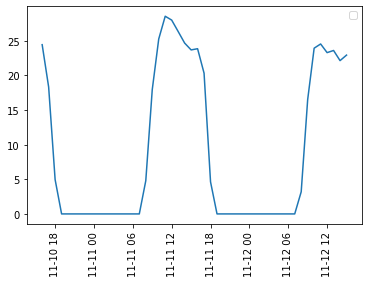

In [85]:
import matplotlib.pyplot as plt
# Graph the prediction vs actual (Orange is prediction)
plt.plot(nn_results['Date_Time'],nn_results['pred'])
plt.xticks(rotation=90)
plt.legend()
plt.show()